In [40]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import string
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM,Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_review_imdb=pd.read_csv("/content/drive/MyDrive/imdb_reviews.csv")
test_review_imdb=pd.read_csv("/content/drive/MyDrive/test_reviews.csv")


In [7]:
train_review_imdb.head()

,Reviews,Sentiment
0,<START this film was just brilliant casting lo...,positive
1,<START big hair big boobs bad music and a gian...,negative
2,<START this has to be one of the worst films o...,negative
3,<START the <UNK> <UNK> at storytelling the tra...,positive
4,<START worst mistake of my life br br i picked...,negative


In [8]:
word_index_integer=pd.read_csv("/content/drive/MyDrive/word_indexes.csv")



 transform the string data into integer format

In [9]:
word_index_integer.head()


,Words,Indexes
0,tsukino,52009
1,nunnery,52010
2,sonja,16819
3,vani,63954
4,woods,1411


Build a Library

In [10]:

word_index_integer=dict(zip(word_index_integer.Words,word_index_integer.Indexes))

word_index_integer["<PAD>"]=0
word_index_integer["<START"]=1
word_index_integer["<UNK>"]=2
word_index_integer["<UNUSED>"]=3

Encode the text

In [13]:
def encode_reviews(text):
  encode = [word_index_integer[word] for word in text]
  return encode



In [14]:
train_data,train_labels=train_review_imdb['Reviews'],test_review_imdb['Sentiment']
test_data, test_labels=train_review_imdb['Reviews'],test_review_imdb['Sentiment']


In [15]:
train_data=train_data.apply(lambda review:review.split())
test_data=test_data.apply(lambda review:review.split())



In [16]:
train_data.head()

0    [<START, this, film, was, just, brilliant, cas...
1    [<START, big, hair, big, boobs, bad, music, an...
2    [<START, this, has, to, be, one, of, the, wors...
3    [<START, the, <UNK>, <UNK>, at, storytelling, ...
4    [<START, worst, mistake, of, my, life, br, br,...
Name: Reviews, dtype: object

In [17]:
train_data=train_data.apply(encode_reviews)
test_data=test_data.apply(encode_reviews)



In [18]:
train_data.head()

0    [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1    [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2    [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3    [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4    [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
Name: Reviews, dtype: object

Encode the labels

In [19]:
def encode_sentiments(x):
  if x=='negative':
    return 0
  else:
    return 1

train_labels=train_labels.apply(encode_sentiments)
test_labels=test_labels.apply(encode_sentiments)

In [20]:
train_labels.head()

0    0
1    1
2    1
3    0
4    1
Name: Sentiment, dtype: int64

Preprocessing

In [21]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index_integer["<PAD>"],padding='post',maxlen=500)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index_integer["<PAD>"],padding='post',maxlen=500)

Confusion Matrix

In [35]:
def CM(model,input,output):
    output_pred = model.predict(input)
    acc = accuracy_score(output, output_pred)
    f1=f1_score(output, output_pred)
    cm=confusion_matrix(output, output_pred)
    report=classification_report(output, output_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm,annot=True,cmap='PiYG',xticklabels=[0,1],fmt='d', annot_kws={"fontsize":20})
    plt.xlabel("Predicted",fontsize=15)
    plt.ylabel("Actual",fontsize=15)
    plt.show()
    print("\nAccuracy: ",round(acc,2))
    print("\nF1 Score: ",round(f1,2))

    print("\nReport:",report)

XGBoost

In [ ]:
model_1 = XGBClassifier() 
model_1.fit(train_data, train_labels)
CM(model_1,test_data, test_labels)



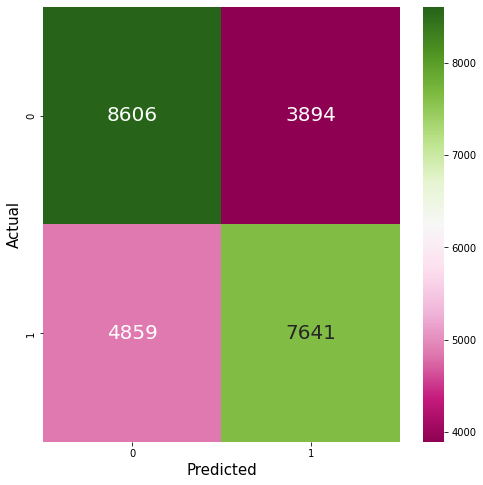


Accuracy:  0.65

F1 Score:  0.64

Report:               precision    recall  f1-score   support

           0       0.64      0.69      0.66     12500
           1       0.66      0.61      0.64     12500

    accuracy                           0.65     25000
   macro avg       0.65      0.65      0.65     25000
weighted avg       0.65      0.65      0.65     25000



In [46]:
CM(model_1,test_data, test_labels)

RandomForest

In [43]:
model_2 = RandomForestClassifier(n_estimators = 100, max_depth = 5 )
model_2.fit(train_data, train_labels)

RandomForestClassifier(max_depth=5)

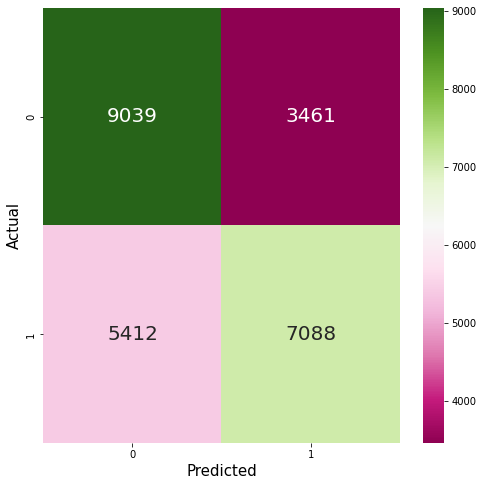


Accuracy:  0.65

F1 Score:  0.62

Report:               precision    recall  f1-score   support

           0       0.63      0.72      0.67     12500
           1       0.67      0.57      0.62     12500

    accuracy                           0.65     25000
   macro avg       0.65      0.65      0.64     25000
weighted avg       0.65      0.65      0.64     25000



In [45]:
CM(model_2,test_data, test_labels)

Neural Network - Keras

In [61]:
model_3=keras.Sequential([keras.layers.Embedding(10000,16,input_length=500),
                        keras.layers.GlobalAveragePooling1D(),
                        keras.layers.Dense(16,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])

callback = EarlyStopping(monitor='val_loss', patience=10)
print(model_3.summary())
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



history=model_3.fit(train_data,train_labels,epochs=50,batch_size=128,validation_split=0.2,callbacks=[callback])



loss,accuracy=model_3.evaluate(test_data,test_labels)
#y_pred_1 = model_3.predict(test_data)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 16)           160000    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 0.6932 - accuracy: 0.4970 - val_los

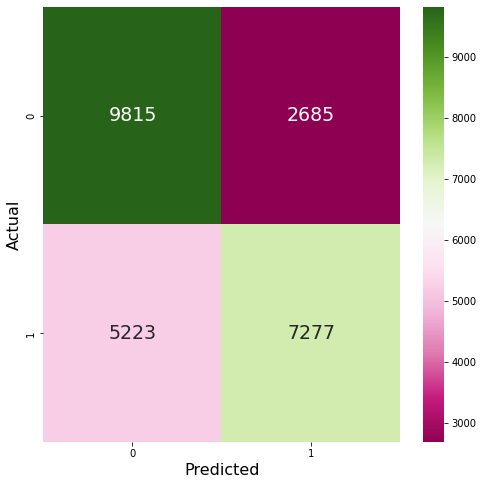

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(test_labels, (model_3.predict(test_data) > 0.5).astype("int32")),annot=True,cmap='PiYG',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()

CNN_LSTM

In [65]:

callback = EarlyStopping(monitor='val_loss', patience=10)
model_4 = Sequential()
model_4.add(Embedding(input_dim=10000, output_dim=16, input_length=500))
model_4.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_4.add(MaxPooling1D(pool_size=2))
model_4.add(LSTM(100))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

history=model_4.fit(train_data,train_labels,epochs=50,batch_size=128,validation_split=0.2,callbacks=[callback])



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 16)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 500, 32)           1568      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 214,869
Trainable params: 214,869
Non-trainable params: 0
________________________________________________

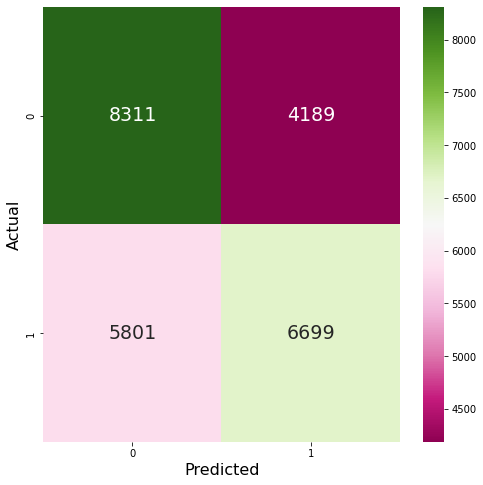

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(test_labels, (model_4.predict(test_data) > 0.5).astype("int32")),annot=True,cmap='PiYG',xticklabels=[0,1],fmt='d',annot_kws={"fontsize":19})
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actual",fontsize=16)
plt.show()